<a href="https://colab.research.google.com/github/yuki-2000/Image_processing_lecture/blob/main/IP2022_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 初期設定（このセルの中身は触らなくて良い）
import numpy as np # 数値解析パッケージnumpyのimport
import cv2 # 画像処理パッケージopencvのimport
import matplotlib.pyplot as plt # 描画パッケージmatplotlibのimport
import imutils


# Google Colab固有の設定
from google.colab import files
from google.colab.patches import cv2_imshow

# Google driveのmount
from google.colab import drive
drive.mount('/content/drive/')
# Google Colab用directoryに移動
%cd "/content/drive/MyDrive/Colab Notebooks/画像処理/"



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/画像処理


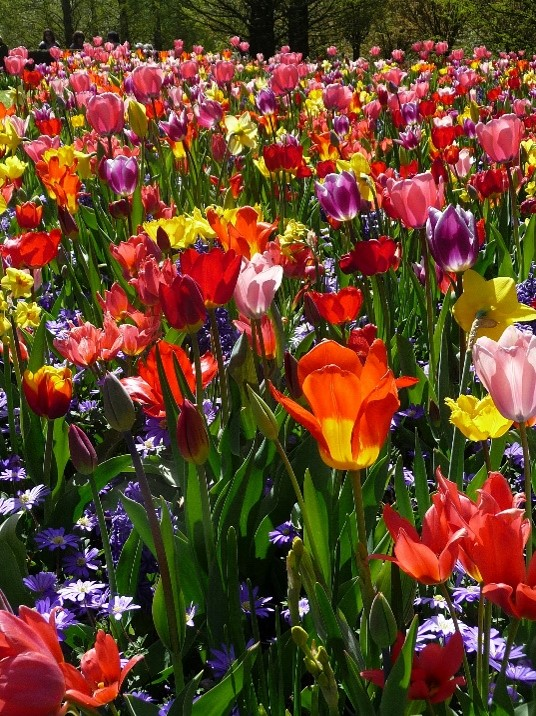

In [ ]:
### 1-1: 画像の読込と表示

img = imutils.url_to_image('https://bit.ly/3ED08Rd')

# 読み込めなかった場合の例外処理
if img is None:
  print("there is no file")
# 画像の表示
cv2_imshow(img)

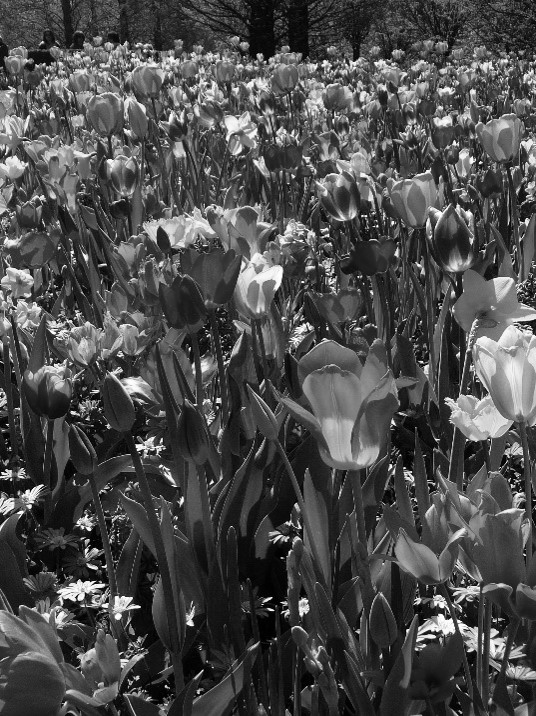

True

In [ ]:
### 1-2: 色空間の変換，画像の書き出し
img_GRAY = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 画像の表示
cv2_imshow(img_GRAY)
# 画像のファイルへの書き出し
cv2.imwrite("img_g.jpg", img_GRAY)

image Blue, Green, Red


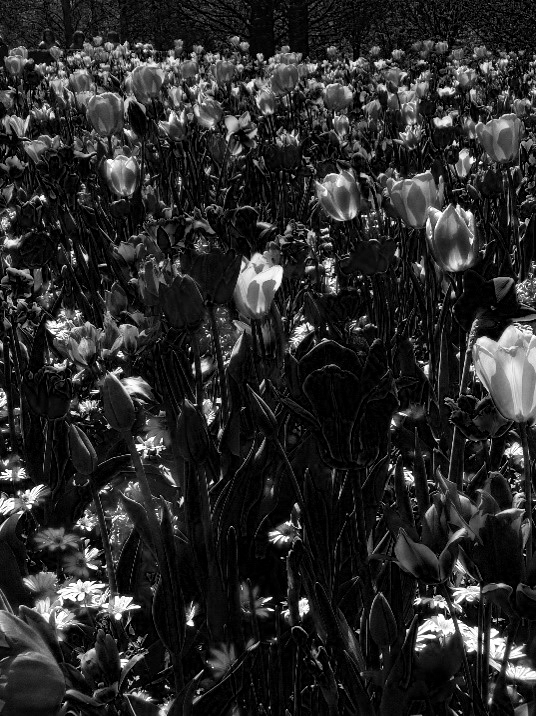

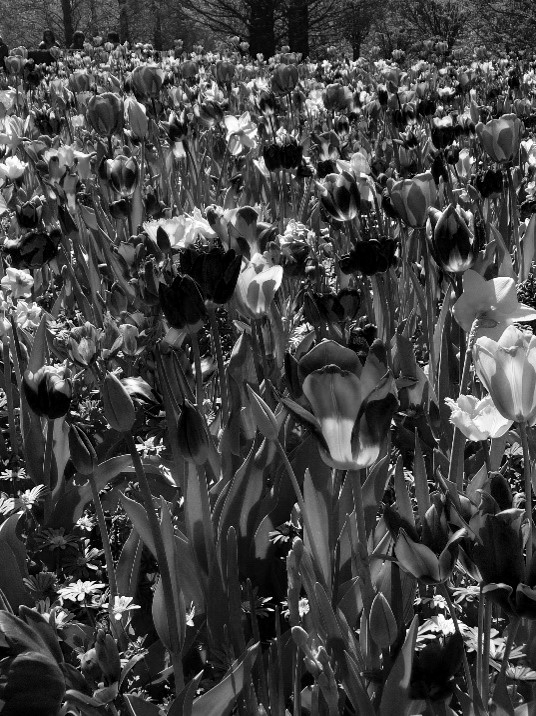

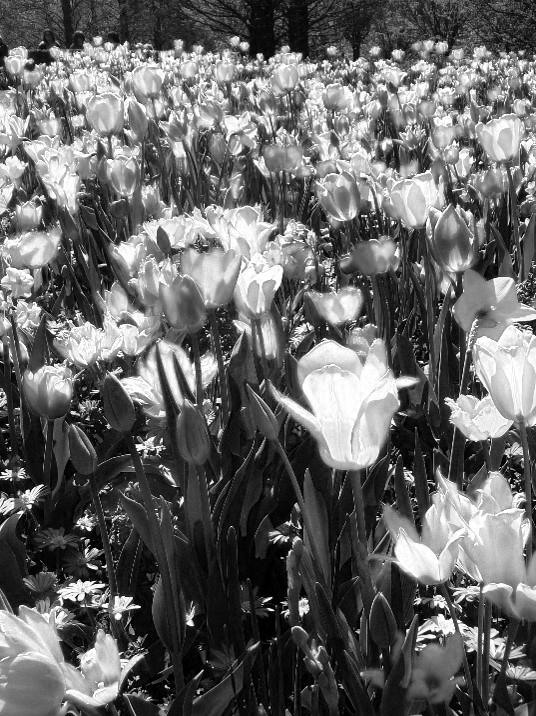

In [ ]:
### 1-3a: RGBチャネルの分割
img_bgr = cv2.split(img)
# 分割結果はBGRの順にチャネルに分かれている

print("image Blue, Green, Red")
for splitimg in img_bgr:
  cv2_imshow(splitimg)


merge RGB order


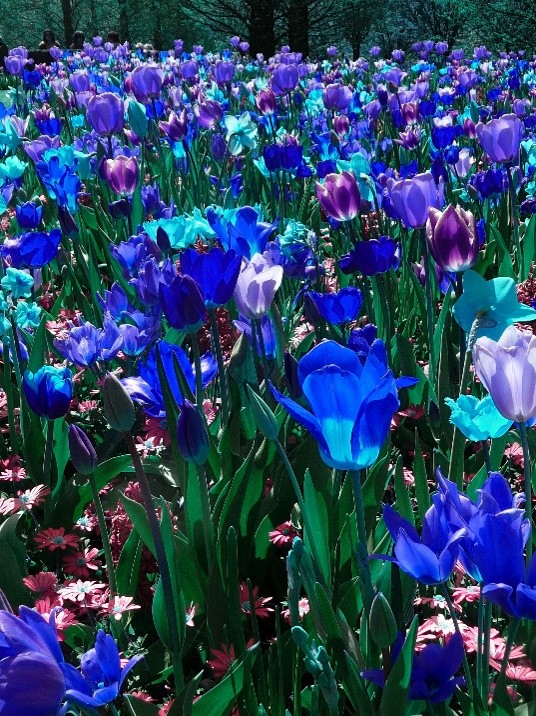

merge BGR order


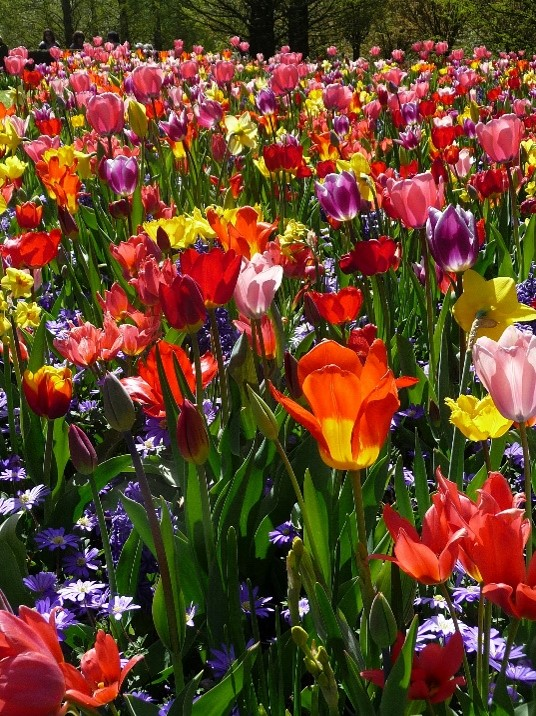

In [ ]:
### 1-3b: RGBチャネルの統合

# RGBの順に統合するとおかしくなる
print("merge RGB order")
img2RGB = cv2.merge((img_bgr[2], img_bgr[1], img_bgr[0])) 
cv2_imshow(img2RGB)
# BGRの順に統合すべし
print("merge BGR order")
img2BGR = cv2.merge((img_bgr[0], img_bgr[1], img_bgr[2])) 
cv2_imshow(img2BGR)

image Hue, Saturation, Value


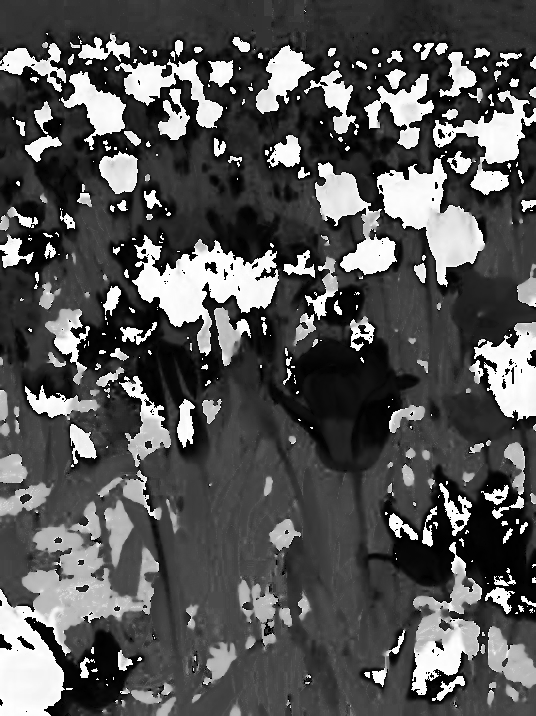

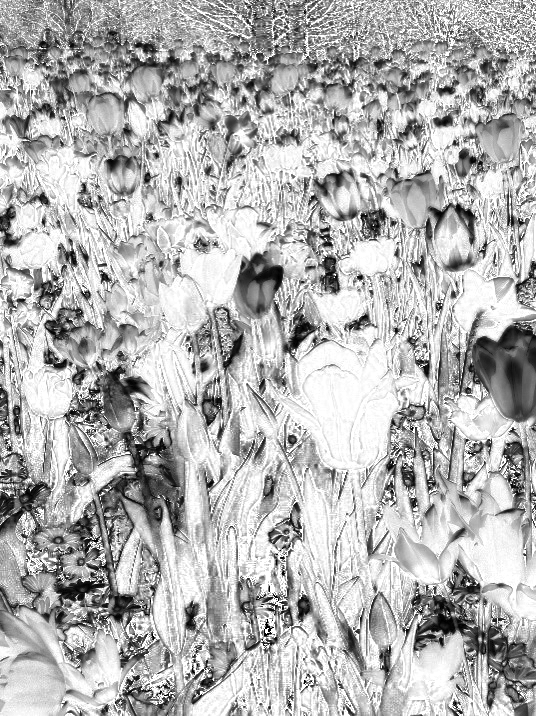

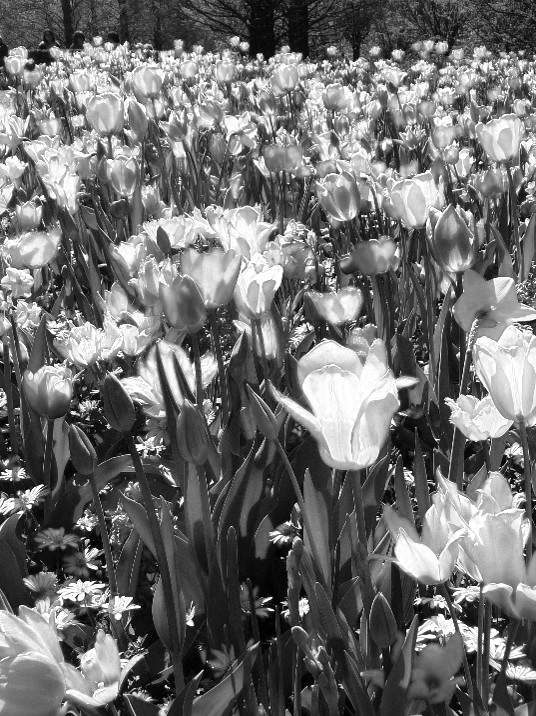

In [ ]:
### 1-4a: HSVチャネルの分割

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL)
img_split_hsv = cv2.split(img_hsv)

print("image Hue, Saturation, Value")
for splitimg in img_split_hsv:
  cv2_imshow(splitimg)

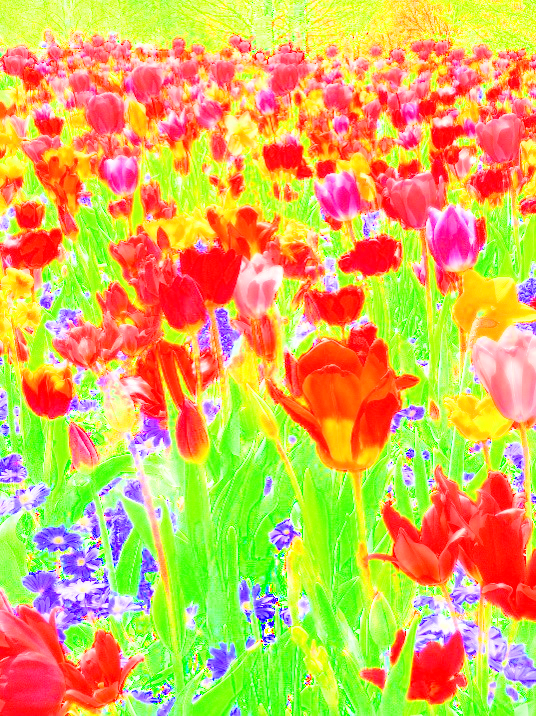

In [ ]:
### 1-4b 明度を無視した（明るさの影響を排除した）画像を出力
      # 全画素について3つ目のチャネル（チャネル番号：2）の値を全て255にする
img_hsv[:,:,2] = 255
# HSV表現からBGR表現に戻す
hs_img = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR_FULL)
cv2_imshow(hs_img)


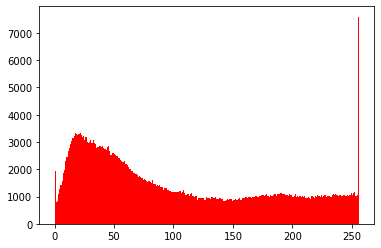

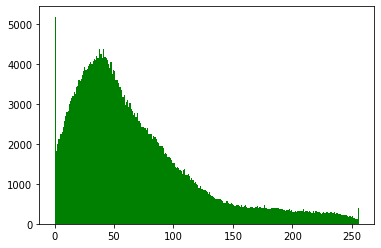

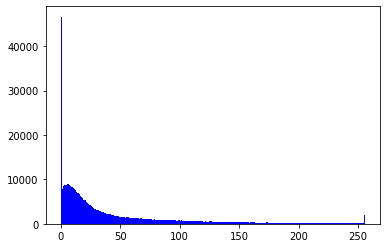

In [ ]:
### 1-5a ヒストグラムの描画
plt.hist(img_bgr[2].ravel(), bins = 256, range=[0,256], color="r")
plt.show()
plt.hist(img_bgr[1].ravel(), bins = 256, range=[0,256], color="g")
plt.show()
plt.hist(img_bgr[0].ravel(), bins = 256, range=[0,256], color="b")
plt.show()

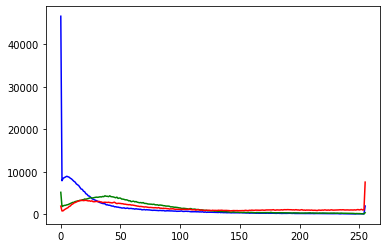

In [ ]:
### 1-5b 少し高度なヒストグラムの描画
color = ("b","g","r")
for i, col in enumerate(color):
  histr = cv2.calcHist([img], channels=[i], mask=None, histSize=[256], ranges=[0,256])
  plt.plot(histr, color= col)
plt.xlim=(0,256)
plt.ylim=(0,10000)

plt.show()